In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("student_exam_scores.csv")
df

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [4]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


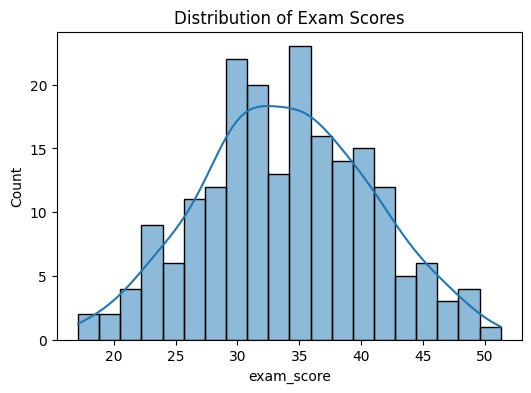

In [5]:
plt.figure(figsize=(6,4))
sns.histplot(df['exam_score'], kde=True, bins=20)
plt.title('Distribution of Exam Scores')
plt.show()

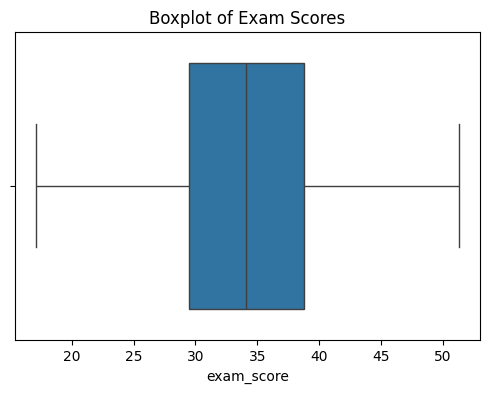

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['exam_score'])
plt.title('Boxplot of Exam Scores')
plt.show()

<Axes: >

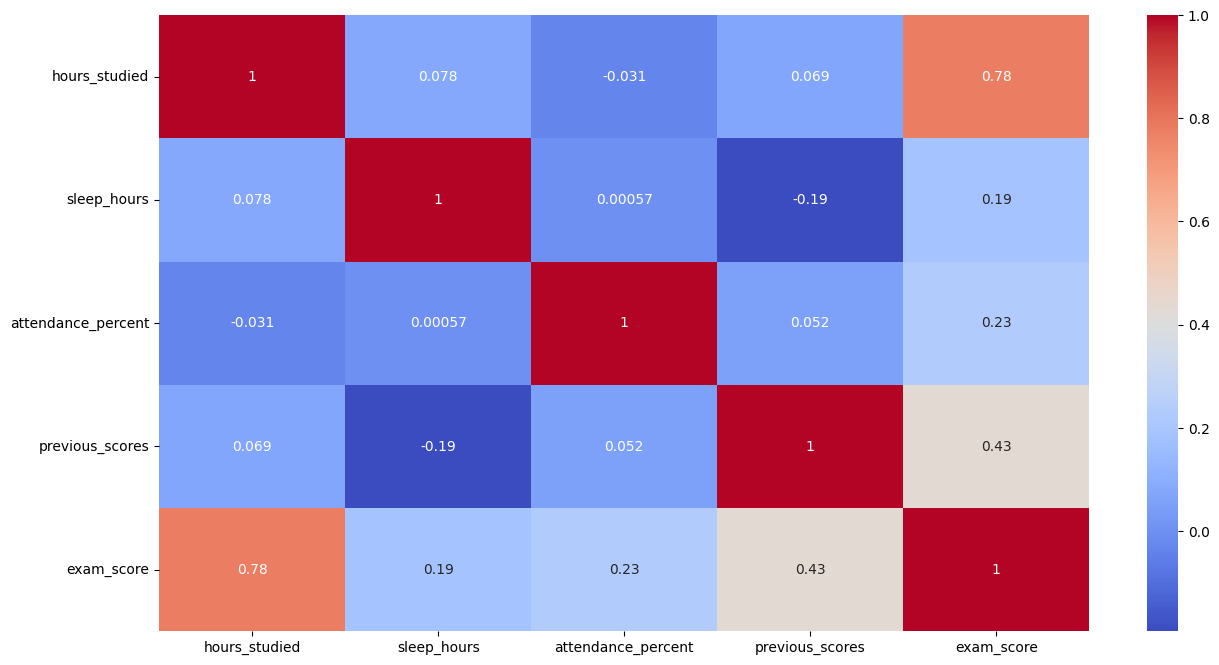

In [7]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = 'coolwarm')

# Correlation Exam Scores & Hours studied

{'pearson_r': 0.777, 'pearson_p': 1.27e-41, 'spearman_r': 0.788, 'spearman_p': 1.34e-43}


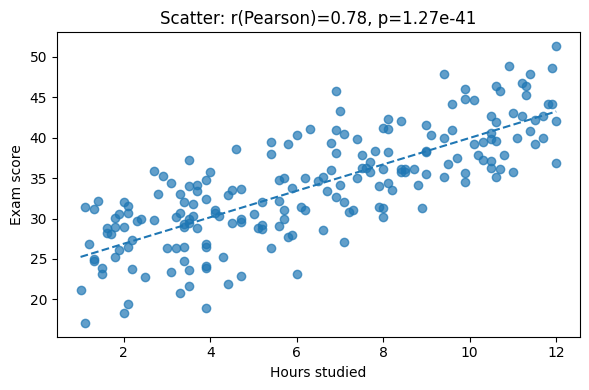

In [8]:
from scipy import stats
pearson_r, pearson_p = stats.pearsonr(df['hours_studied'], df['exam_score'])
spearman_r, spearman_p = stats.spearmanr(df['hours_studied'], df['exam_score'])
print({
'pearson_r': round(pearson_r, 3), 'pearson_p': float(f'{pearson_p:.3g}'),
'spearman_r': round(spearman_r, 3), 'spearman_p': float(f'{spearman_p:.3g}')
})
x = df['hours_studied'].values
y = df['exam_score'].values
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)
plt.plot([x.min(), x.max()], [m*x.min()+b, m*x.max()+b], linestyle='--')
plt.xlabel('Hours studied')
plt.ylabel('Exam score')
plt.title(f'Scatter: r(Pearson)={pearson_r:.2f}, p={pearson_p:.3g}')
plt.tight_layout()
plt.show()

# Correlation Exam Scores & Sleep Hours

{'pearson_r': 0.188, 'pearson_p': 0.00761, 'spearman_r': 0.162, 'spearman_p': 0.0222}


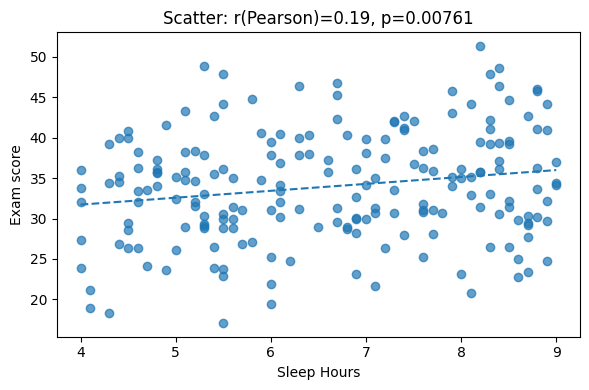

In [9]:
pearson_r, pearson_p = stats.pearsonr(df['sleep_hours'], df['exam_score'])
spearman_r, spearman_p = stats.spearmanr(df['sleep_hours'], df['exam_score'])
print({
'pearson_r': round(pearson_r, 3), 'pearson_p': float(f'{pearson_p:.3g}'),
'spearman_r': round(spearman_r, 3), 'spearman_p': float(f'{spearman_p:.3g}')
})
x = df['sleep_hours'].values
y = df['exam_score'].values
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)
plt.plot([x.min(), x.max()], [m*x.min()+b, m*x.max()+b], linestyle='--')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam score')
plt.title(f'Scatter: r(Pearson)={pearson_r:.2f}, p={pearson_p:.3g}')
plt.tight_layout()
plt.show()

# Correlation Exam Scores & Attendance Percent

{'pearson_r': 0.226, 'pearson_p': 0.00131, 'spearman_r': 0.216, 'spearman_p': 0.00211}


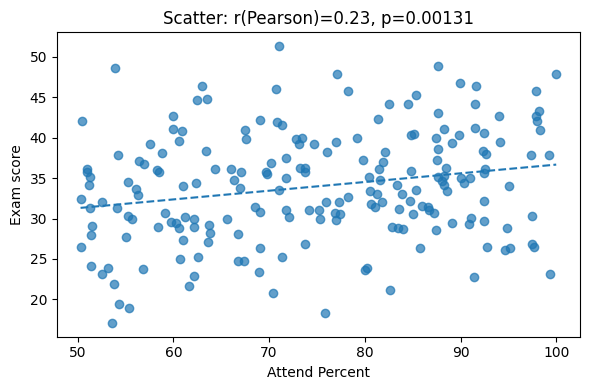

In [10]:
pearson_r, pearson_p = stats.pearsonr(df['attendance_percent'], df['exam_score'])
spearman_r, spearman_p = stats.spearmanr(df['attendance_percent'], df['exam_score'])
print({
'pearson_r': round(pearson_r, 3), 'pearson_p': float(f'{pearson_p:.3g}'),
'spearman_r': round(spearman_r, 3), 'spearman_p': float(f'{spearman_p:.3g}')
})
x = df['attendance_percent'].values
y = df['exam_score'].values
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)
plt.plot([x.min(), x.max()], [m*x.min()+b, m*x.max()+b], linestyle='--')
plt.xlabel('Attend Percent')
plt.ylabel('Exam score')
plt.title(f'Scatter: r(Pearson)={pearson_r:.2f}, p={pearson_p:.3g}')
plt.tight_layout()
plt.show()

# Correlation Exam Scores & Previous Scores

{'pearson_r': 0.431, 'pearson_p': 1.86e-10, 'spearman_r': 0.427, 'spearman_p': 2.77e-10}


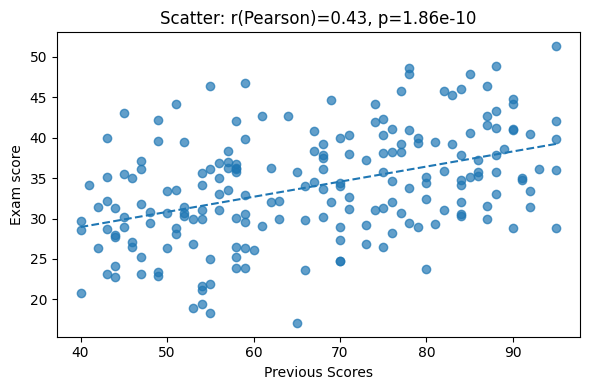

In [11]:
pearson_r, pearson_p = stats.pearsonr(df['previous_scores'], df['exam_score'])
spearman_r, spearman_p = stats.spearmanr(df['previous_scores'], df['exam_score'])
print({
'pearson_r': round(pearson_r, 3), 'pearson_p': float(f'{pearson_p:.3g}'),
'spearman_r': round(spearman_r, 3), 'spearman_p': float(f'{spearman_p:.3g}')
})
x = df['previous_scores'].values
y = df['exam_score'].values
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.7)
plt.plot([x.min(), x.max()], [m*x.min()+b, m*x.max()+b], linestyle='--')
plt.xlabel('Previous Scores')
plt.ylabel('Exam score')
plt.title(f'Scatter: r(Pearson)={pearson_r:.2f}, p={pearson_p:.3g}')
plt.tight_layout()
plt.show()

# Feature Selection

In [12]:
# Features and target
X = df.drop(columns=["student_id", "exam_score"])
y = df["exam_score"]
X

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,8.0,8.8,72.1,45
1,1.3,8.6,60.7,55
2,4.0,8.2,73.7,86
3,3.5,4.8,95.1,66
4,9.1,6.4,89.8,71
...,...,...,...,...
195,10.5,5.4,94.0,87
196,7.1,6.1,85.1,92
197,1.6,6.9,63.8,76
198,12.0,7.3,50.5,58


# Train and Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape

(160, 4)

In [15]:
X_train.isnull().any()

hours_studied         False
sleep_hours           False
attendance_percent    False
previous_scores       False
dtype: bool

In [20]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_predict = model.predict(X_test)

# Evaluation
print("MSE", mean_squared_error(y_test,y_predict))
print("R2 Score:", r2_score(y_test, y_predict))

# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)
# print("MAE:", mean_absolute_error(y_test, y_predict))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))


MSE 7.761782668623072
R2 Score: 0.8537447137159517


In [21]:
y_predict

array([28.88607164, 29.68042066, 35.31195586, 31.18044826, 39.44894287,
       41.69158322, 23.96918347, 45.72250896, 41.6529321 , 27.47615681,
       26.09033959, 44.45348162, 27.22577144, 29.33836752, 36.53825172,
       34.75877399, 31.5395367 , 28.52996777, 40.3792585 , 29.84951368,
       21.85245583, 24.08822626, 27.61839558, 27.93331998, 35.96012145,
       43.8081039 , 34.91507705, 28.592239  , 37.57486402, 43.9712545 ,
       27.7683444 , 37.33910217, 37.03824477, 28.28799615, 42.6421297 ,
       21.64648068, 38.42517152, 36.15049022, 44.91531908, 35.47066788])

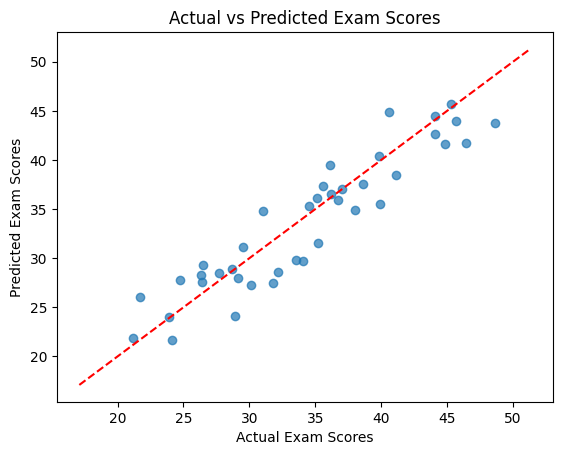

In [22]:
# Plot actual vs predicted
plt.scatter(y_test, y_predict, alpha=0.7)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

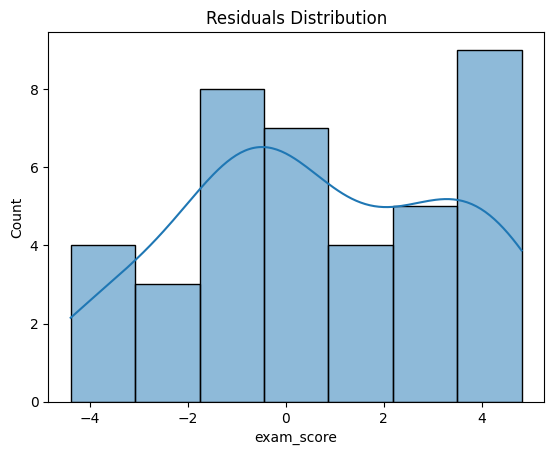

In [23]:
# Residual plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# Testing

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

algorithms = [LinearRegression(), SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]

algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [29]:
from sklearn.model_selection import KFold, cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-7.39691592 -8.49386529 -7.73163976 -6.50451002 -7.09890112]; Mean: -7.445166420639384
SVR - Score: [-29.99485089 -37.53225837 -37.71998674 -32.61807552 -31.50364327]; Mean: -33.87376295628499
KNeighbors Regressor - Score: [-18.77385   -25.8687125 -19.423675  -29.557325  -27.4929375]; Mean: -24.223300000000005
Decision-Tree Regressor - Score: [-20.4565625 -29.31375   -32.3846875 -16.4584375 -17.0334375]; Mean: -23.129374999999996
Random-Forest Regressor - Score: [-11.34953653 -12.64781478 -13.03194694 -11.84993928 -12.48799725]; Mean: -12.27344695625001
